In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [62]:
sms=pd.read_csv("spamSMS.csv", encoding="utf-8")
sms.head()

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
sms.shape


(5574, 2)

In [64]:
sms['Class'].value_counts()

ham     4827
spam     747
Name: Class, dtype: int64

In [65]:
print('Spam Ratio = ',np.round(len(sms[sms["Class"]=='spam'])/len(sms['Class']),2)*100)
print('Ham Ratio = ',np.round(len(sms[sms["Class"]=='ham'])/len(sms['Class']),2)*100)

Spam Ratio =  13.0
Ham Ratio =  87.0


In [66]:
#replacing Class name ham to 0 and Spam to 1
sms['Class'].replace({'ham':0,'spam':1})

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: Class, Length: 5574, dtype: int64

In [67]:
sms.head()

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [68]:
sms.groupby("Class").describe()

input Text                                                            \
           count unique                                                top   
Class                                                                        
ham         4827   4518                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

            
      freq  
Class       
ham     30  
spam     4

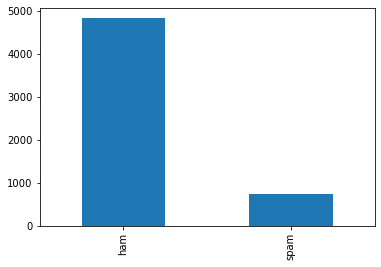

In [69]:
sms.Class.value_counts().plot.bar();

In [70]:
sms['length']=sms['input Text'].str.len();

In [71]:
sms.head();

In [72]:
#Getting rid of Stopwords
import nltk
nltk.download('stopwords')
sw=set(stopwords.words('english')+['u','ū','ur','im','dont','doin','ure'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rohitky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
sms['input Text']=sms['input Text'].apply(lambda x: ' '.join(term for term in x.split() if term not in sw))

In [74]:
#New Column lenght after removing stopwords
sms['new_length']=sms['input Text'].str.len();

In [75]:
#as we can see that the lenght has changed after removiung the stopwords
sms.head()

,Class,input Text,length,new_length
0,ham,"Go jurong point, crazy.. Available bugis n gre...",111,91
1,ham,Ok lar... Joking wif oni...,29,27
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,155,141
3,ham,U dun say early hor... U c already say...,49,41
4,ham,"Nah I think goes usf, lives around though",61,41


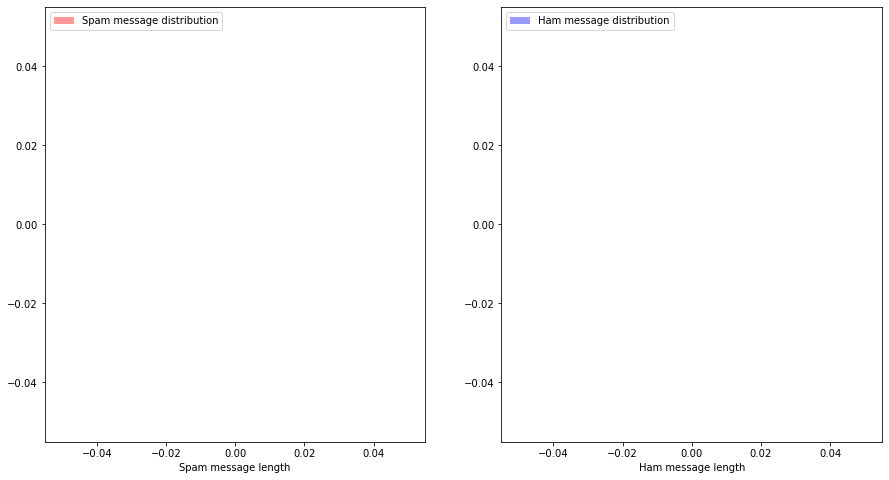

In [79]:
#Display Spam and Ham messages Distribution by plotiing the graph 
f,ax=plot.subplots(1,2,figsize=(15,8));

sns.distplot(sms[sms['Class']==1],bins=20,ax=ax[0],label='Spam message distribution',color='r');

ax[0].set_xlabel('Spam message length');
ax[0].legend();

sns.distplot(sms[sms['Class']==0],bins=20,ax=ax[1],label='Ham message distribution',color='b');

ax[1].set_xlabel('Ham message length');
ax[1].legend();

plot.show();